In [50]:
# Dependencies and Setup
import pandas as pd
import datetime as date
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Import data to pd, and display sample
insurance_csv = 'Data/cgr-premiums-table.csv'
ins_df = pd.read_csv(insurance_csv)
ins_df.head()

,gender,birthdate,ypc,current_premium,age
0,M,10/5/1947,0,863.97,75.17
1,F,7/6/1953,0,828.63,69.42
2,M,4/18/1956,0,1000.59,66.63
3,F,8/16/1956,0,700.42,66.30
4,F,1/23/1957,0,505.92,65.87


In [52]:
# Create bins of age ranges
bins = [25, 29.99, 39.99, 49.99, 59.99, 69.99, 79.99, 89.99, 99.99, 200]
group_names = ["25-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100", "100+"]

In [53]:
# Add bins to df
ins_df["Age Range"] = pd.cut(ins_df["age"], bins, labels=group_names, include_lowest=True)
ins_df.head(30)

,gender,birthdate,ypc,current_premium,age,Age Range
0,M,10/5/1947,0,863.97,75.17,70-79
1,F,7/6/1953,0,828.63,69.42,60-69
2,M,4/18/1956,0,1000.59,66.63,60-69
3,F,8/16/1956,0,700.42,66.30,60-69
4,F,1/23/1957,0,505.92,65.87,60-69
5,F,12/31/1960,0,1674.34,61.93,60-69
6,M,2/26/1963,0,1266.17,59.77,50-59
7,F,7/31/1963,0,733.96,59.35,50-59
8,M,12/5/1964,0,1671.38,58.00,50-59
9,F,7/4/1966,0,655.97,56.42,50-59


In [ ]:
# Scatter plot showing age vs current premium


In [61]:
# Create df for count of each gender
gender_counts_df = ins_df["gender"].value_counts().reset_index()
gender_counts_df = gender_counts_df.rename(columns={"index":"Gender","gender":"Count"})
gender_counts_df

,Gender,Count
0,M,53234
1,F,39558


Text(0.5, 1.0, 'Male vs Female Drivers')

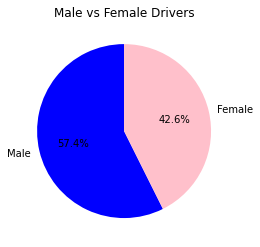

In [55]:
# Create pie chart comparing percentages of each gender
labels = ["Male","Female"]
sizes = [53234, 39558]
colors = ["blue","pink"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Male vs Female Drivers")

<BarContainer object of 2 artists>

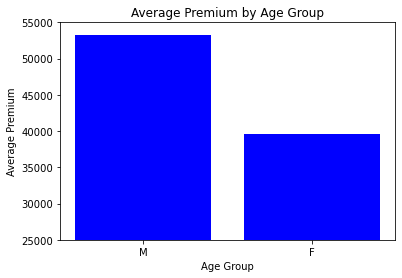

In [63]:
# Create bar chart comparing total count of each gender
# Establish x and y variables
genders = gender_counts_df["Gender"]
gender_count = gender_counts_df["Count"]

# Plot bar graph with above data
plt.title("Average Premium by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Premium")
plt.ylim(25000,55000)
plt.bar(genders, gender_count, color='b', align='center')

In [57]:
# Create df for count of each age range
age_counts_df = ins_df["Age Range"].value_counts().reset_index()
age_counts_df
age_counts_df.rename(columns={"index":"Age Range","Age Range":"Count"})

,Age Range,Count
0,60-69,21145
1,50-59,20833
2,40-49,17953
3,30-39,13711
4,70-79,11890
5,80-89,5105
6,90-100,1830
7,100+,178
8,25-29,147


Text(0.5, 1.0, 'Age Group Percentage')

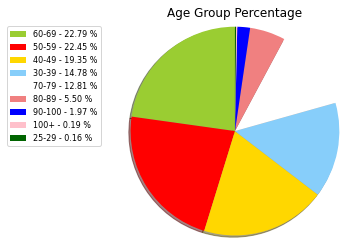

In [72]:
# Labels for pie chart
labels = np.char.array(['60-69','50-59','40-49','30-39','70-79','80-89','90-100','100+','25-29'])

# Values of each section
sizes = np.array([21145,20833,17953,13711,11890,5105,1830,178,147])

# Format and plot pie graph with legend
percent = sizes/sizes.sum()*100

colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
patches, texts = plt.pie(sizes, shadow=True, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title("Age Group Percentage")

In [59]:
# Group by age range and find mean of current_premium
age_group_df = ins_df.groupby(["Age Range"]).mean()
age_group_df2 = age_group_df.reset_index()
age_group_df2

,Age Range,ypc,current_premium,age
0,25-29,1.972789,977.516054,29.353810
1,30-39,3.374079,875.024513,36.204732
2,40-49,3.608645,962.421221,44.881979
3,50-59,3.967887,1134.201804,55.199210
4,60-69,4.179806,1156.396674,64.782437
5,70-79,4.393440,1014.475426,74.419209
6,80-89,4.578452,878.631642,84.226784
7,90-100,4.621858,750.839344,93.753754
8,100+,4.702247,706.409944,102.081124


<BarContainer object of 9 artists>

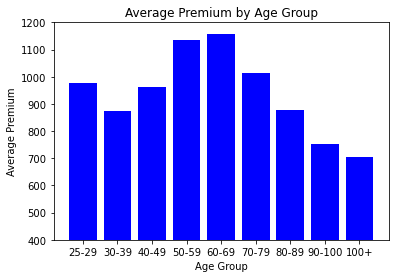

In [60]:
# Establish x and y variables
age_groups = age_group_df2["Age Range"]
premium = age_group_df2["current_premium"]

# Plot bar graph with above data
plt.title("Average Premium by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Premium")
plt.ylim(400,1200)
plt.bar(age_groups, premium, color='b', align='center')